# Preprocessing Image

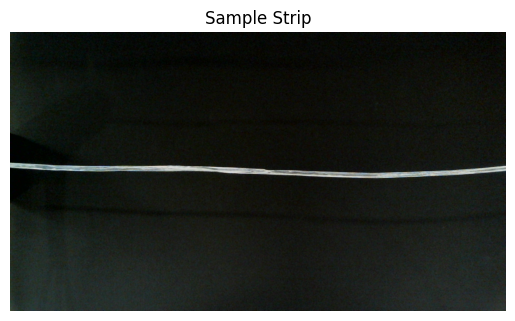

In [1]:
# Step 1: Image Acquisition and Display
import cv2
import matplotlib.pyplot as plt
import numpy as np 

image_data = r"F:\FILAMENT\images\sample3.jpg"
image_fil = cv2.imread(image_data)

# Convert BGR (OpenCV default) to RGB for matplotlib
image_fil = cv2.cvtColor(image_fil, cv2.COLOR_BGR2RGB)

plt.imshow(image_fil)
plt.title("Sample Strip")
plt.axis("off")
plt.show()

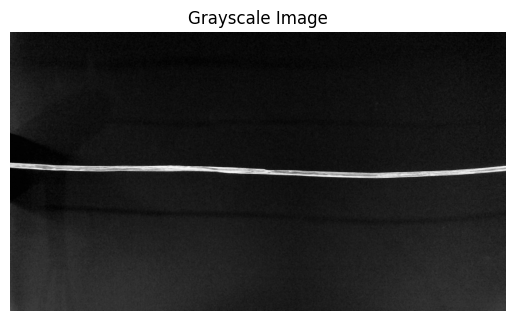

In [2]:
# Step 2: convert image to grayscale
gray_fil = cv2.cvtColor(image_fil, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_fil, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

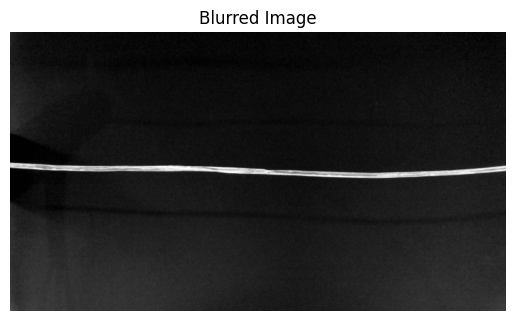

In [3]:
# Step 3: Noise removal using Gaussian Blur
blurred_fil = cv2.GaussianBlur(gray_fil, (5, 5), 0)
plt.imshow(blurred_fil, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")
plt.show()

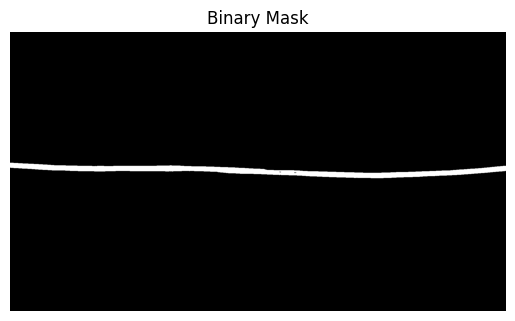

In [4]:
# Step 4: apply thresholding to obtain binary mask
threshold_value, binary_fil = cv2.threshold(
        blurred_fil, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
plt.imshow(binary_fil, cmap='gray')
plt.title("Binary Mask")
plt.axis("off")
plt.show()

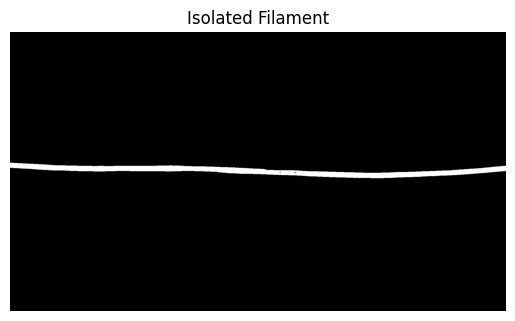

In [5]:
# Step 5: Retain Big Island 
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_fil, connectivity=8)
largest_component = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
isolated_filament = np.where(labels == largest_component, 255, 0).astype('uint8')
plt.imshow(isolated_filament, cmap='gray')
plt.title("Isolated Filament")
plt.axis("off")
plt.show()

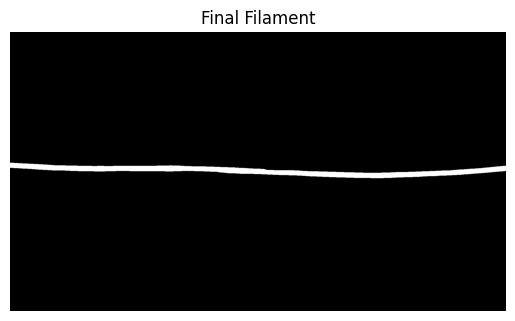

True

In [7]:
# step 6: hole filling
final_filament = cv2.morphologyEx(isolated_filament, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
plt.imshow(final_filament, cmap='gray')
plt.title("Final Filament")
plt.axis("off")
plt.show()
cv2.imwrite(r"F:\FILAMENT\images\final_filament.jpg", final_filament)
